# Business Sales Performance Analytics

## Objective
Analyze sales data to identify revenue trends, top products,
and regional performance.


In [22]:
import zipfile
import os

zip_path = "archive (4).zip"
extract_path = "data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['online_retail.csv']

## Loading the Dataset
The dataset is loaded into a Pandas DataFrame for analysis.


In [23]:
import pandas as pd

df = pd.read_csv("data/online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Understanding
This step checks the structure and columns of the dataset.


In [5]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Data Cleaning
Cleaning the dataset by removing missing values and invalid records.


In [21]:
df = df.dropna(subset=['Description'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## Feature Engineering
Creating a revenue column for sales analysis.


In [12]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [13]:
df[['Quantity', 'UnitPrice', 'Revenue']].head()

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


## Sales Analysis
Analyzing total revenue, top products, and country-wise performance.


In [14]:
total_revenue = df['Revenue'].sum()
total_revenue

np.float64(10666684.544)

In [15]:
top_products = (
    df.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

,Revenue
Description,
DOTCOM POSTAGE,206248.77
REGENCY CAKESTAND 3 TIER,174484.74
"PAPER CRAFT , LITTLE BIRDIE",168469.60
WHITE HANGING HEART T-LIGHT HOLDER,106292.77
PARTY BUNTING,99504.33
JUMBO BAG RED RETROSPOT,94340.05
MEDIUM CERAMIC TOP STORAGE JAR,81700.92
Manual,78112.82
POSTAGE,78101.88


In [16]:
country_revenue = (
    df.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_revenue

,Revenue
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110
Australia,138521.310
Spain,61577.110
Switzerland,57089.900
Belgium,41196.340


In [18]:
monthly_revenue = (
    df.set_index('InvoiceDate')
    .resample('ME')['Revenue']
    .sum()
)

monthly_revenue.head()

,Revenue
InvoiceDate,
2010-12-31,823746.140
2011-01-31,691364.560
2011-02-28,523631.890
2011-03-31,717639.360
2011-04-30,537808.621


## Data Visualization
Visualizing sales trends and top products.


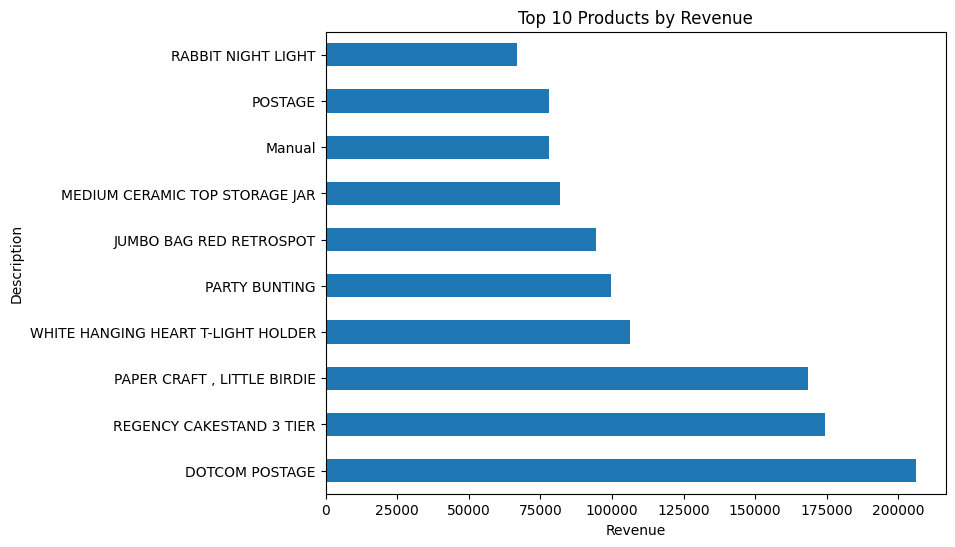

In [19]:
import matplotlib.pyplot as plt

top_products.plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

## Monthly Revenue Trend
This visualization shows the monthly revenue trend over time, helping identify
seasonal patterns and changes in sales performance.


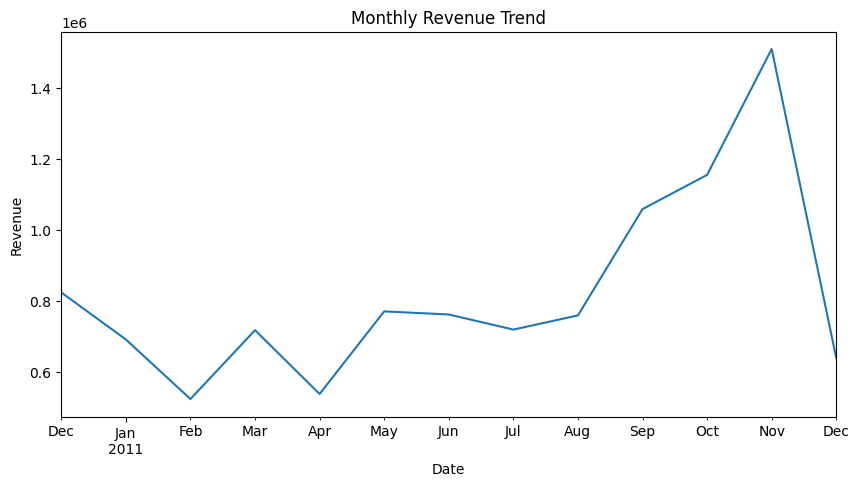

In [20]:
monthly_revenue.plot(figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.show()

## Key Insights
- A small number of products contribute to a large portion of total revenue.
- Sales show clear monthly trends, indicating seasonal demand.
- The United Kingdom is the highest revenue-generating country.
- High-value customers tend to place repeat orders.
.


## Recommendations
- Focus on inventory planning for top-selling products to avoid stockouts.
- Increase marketing efforts during high-sales months to maximize revenue.
- Explore expansion opportunities in high-performing regions.
- Improve customer retention strategies for repeat buyers.



## Conclusion
This analysis explored sales performance using transactional retail data.
By examining revenue trends, top-selling products, and regional performance,
the study provides actionable insights to support data-driven business decisions.
